# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:54.561000,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:55.681073,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:56.801146,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:57.921218,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:59.041291,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:46:52.996000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,8,L4,None,True
2320,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:48:55.396000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,9,L4,None,True
2321,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:50:57.797000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,10,L4,None,True
2322,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:53:00.402000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,11,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   61R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   61R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   61R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   61R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   61R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

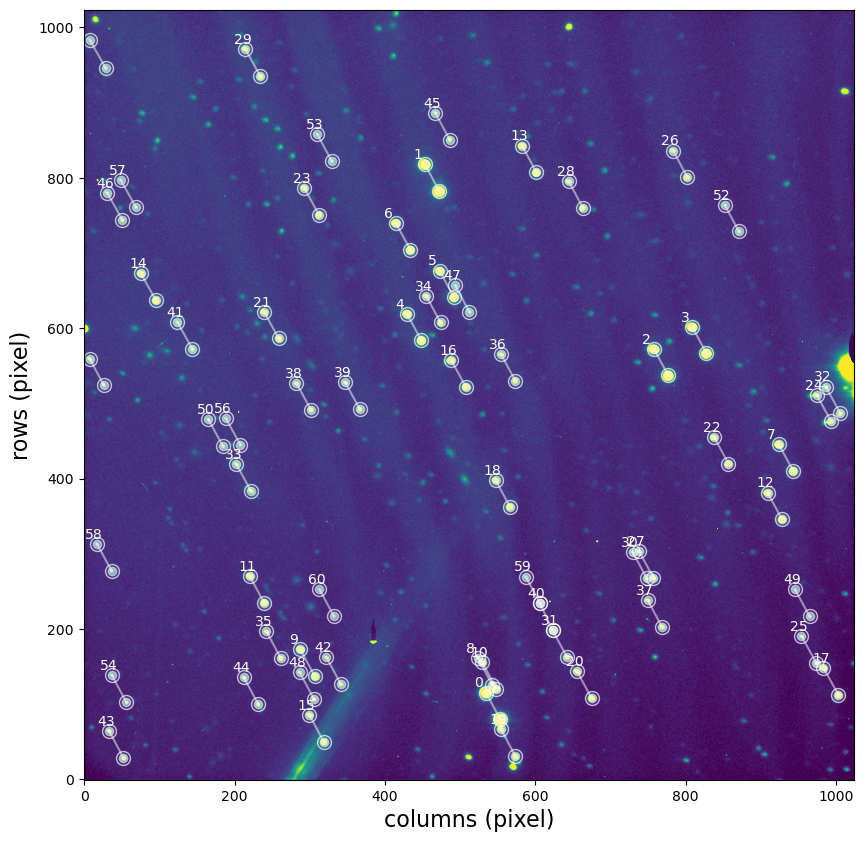

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553124,-38.759809,553.346045,79.734231,5.281357,5.281357,-10.157961,0.001242,-9.740199,0.000465,10,0
1,1,189.564733,-38.693899,472.221850,782.399866,6.108634,6.108634,-9.694345,0.001727,-9.755689,0.000492,10,0
2,2,189.527360,-38.716362,776.766871,537.108508,6.195878,6.195878,-9.332968,0.002225,-9.748711,0.000435,10,0
3,3,189.521319,-38.713473,827.591973,566.635185,6.243768,6.243768,-9.120127,0.002625,-9.751842,0.000446,10,0
4,4,189.567090,-38.712663,448.322523,583.842258,5.923733,5.923733,-8.371507,0.004846,-9.754664,0.000483,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,189.595798,-38.726213,207.596301,445.128401,5.155107,5.155107,-5.529636,0.059457,-9.755103,0.000433,10,0
57,57,189.613442,-38.696703,68.775934,761.014558,5.711419,5.711419,-5.634794,0.054233,-9.758005,0.000442,10,0
58,58,189.616035,-38.742305,36.435513,277.668908,5.002275,5.002275,-5.434955,0.064014,-9.748389,0.000401,10,0
59,59,189.547150,-38.745187,606.179168,234.370506,5.341796,5.341796,-5.160452,0.083939,-9.744266,0.000475,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

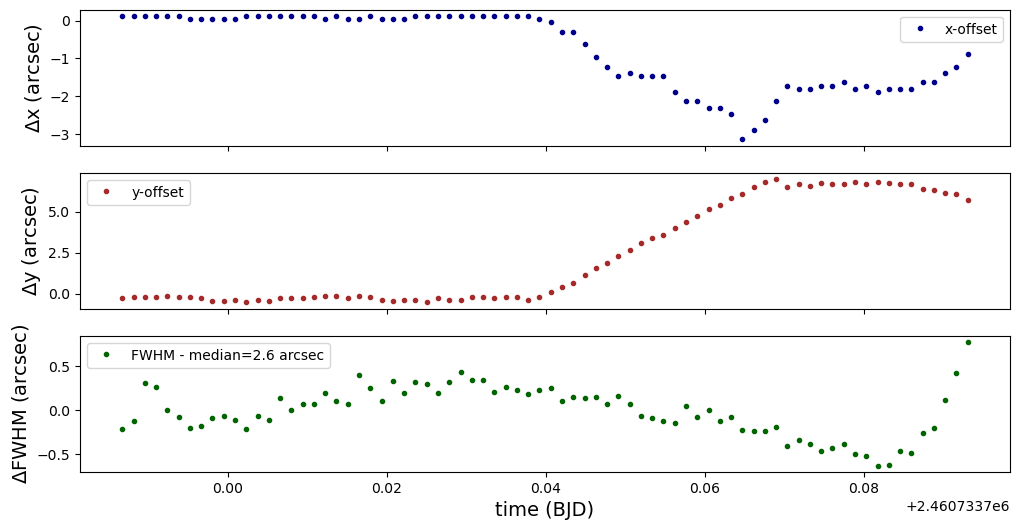

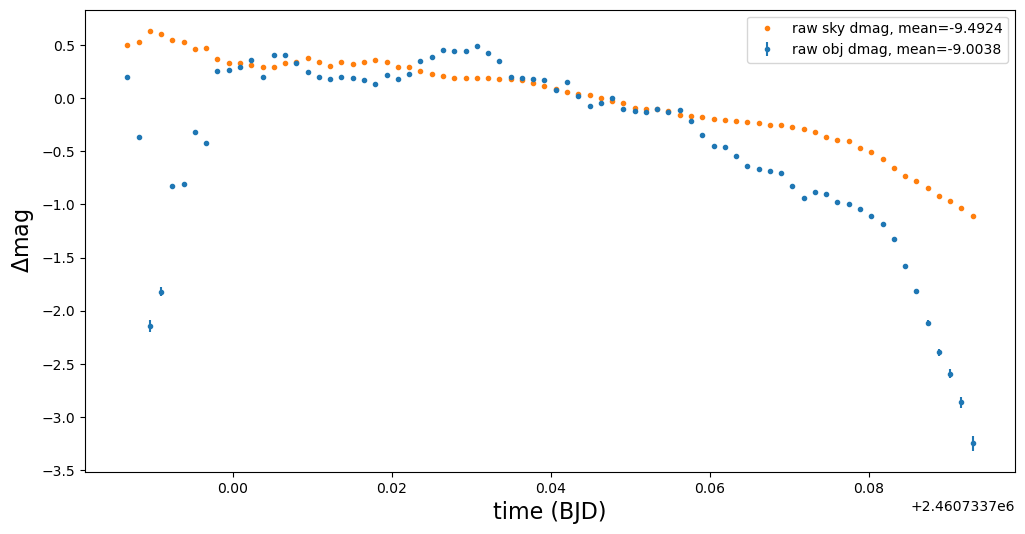

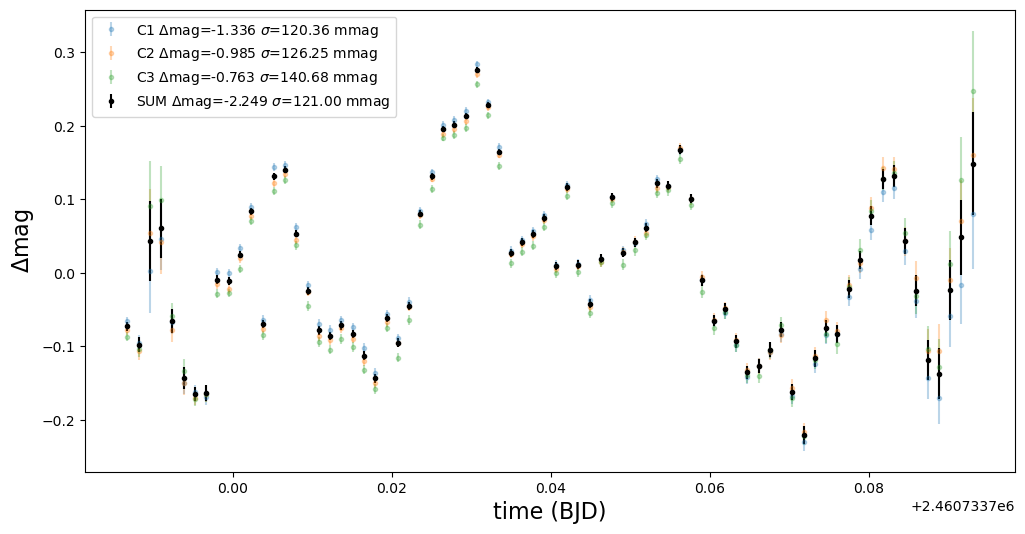

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
2460733.6867161305 438.8036191175437 ...  -0.07241838663049105
2460733.6881361282 438.8036191175437 ...  -0.09807510391800367
 2460733.689552931 438.8036191175437 ...    0.0431483458682953
 2460733.690972975 438.8036191175437 ...  0.060732209870040244
2460733.6923911558 438.8036191175437 ...  -0.06550717999357492
2460733.6938088387 438.8036191175437 ...  -0.14275243818526295
2460733.6952253985 438.5536191175437 ...  -0.16440214932184904
               ...               ... ...                   ...
2460733.7845801935 433.0536191175437 ...   0.04284063793985293
 2460733.785996961 433.0536191175437 ... -0.024089748747873507
  2460733.78741609 433.5536191175437 ...   -0.1185319672567271
 2460733.788832845 433.5536191175437 ...   -0.1373876794018365
 2460733.790249612 434.3036191175437 ... -0.023227988660608823
 2460733.791668741 434.8036191175437 ...  0.04867003729

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     483   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    690   61R x 339C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0073', 'EFE0073', 'FO0074', 'EFO0074', 'FE0074', 'EFE0074', 'FO0075',
       'EFO0075', 'FE0075', 'EFE0075'],
      dtype='object', length=339)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:37:08,037 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:37:08,037 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:37:08,047 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:37:08,047 | INFO | Source index: i=4 


2025-09-18 00:37:08,048 root - INFO - Source RA=189.56708959281926 Dec=-38.712663367471606 mag=-13.716+-0.001  [pipeline_lib]


2025-09-18 00:37:08,048 | INFO | Source RA=189.56708959281926 Dec=-38.712663367471606 mag=-13.716+-0.001


2025-09-18 00:37:08,049 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:37:08,049 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:37:08,050 root - INFO - Polarization in Q: -0.005+-0.002  [pipeline_lib]


2025-09-18 00:37:08,050 | INFO | Polarization in Q: -0.005+-0.002


2025-09-18 00:37:08,050 root - INFO - Polarization in U: -0.001+-0.003  [pipeline_lib]


2025-09-18 00:37:08,050 | INFO | Polarization in U: -0.001+-0.003


2025-09-18 00:37:08,051 root - INFO - Polarization in V: 0.001+-0.001  [pipeline_lib]


2025-09-18 00:37:08,051 | INFO | Polarization in V: 0.001+-0.001


2025-09-18 00:37:08,052 root - INFO - Total linear polarization p: 0.005+-0.002  [pipeline_lib]


2025-09-18 00:37:08,052 | INFO | Total linear polarization p: 0.005+-0.002


2025-09-18 00:37:08,053 root - INFO - Angle of polarization theta: 100+-10 deg  [pipeline_lib]


2025-09-18 00:37:08,053 | INFO | Angle of polarization theta: 100+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:37:08,054 root - INFO - Free constant k: 0.8114794452431625+-0.0  [pipeline_lib]


2025-09-18 00:37:08,054 | INFO | Free constant k: 0.8114794452431625+-0.0


2025-09-18 00:37:08,055 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-09-18 00:37:08,055 | INFO | Zero of polarization: 30.2+-0.0


2025-09-18 00:37:08,056 root - INFO - RMS of zi residuals: 0.021772222041286374  [pipeline_lib]


2025-09-18 00:37:08,056 | INFO | RMS of zi residuals: 0.021772222041286374


2025-09-18 00:37:08,057 root - INFO - Reduced chi-square (n=76.0, DOF=73.0): 1.06  [pipeline_lib]


2025-09-18 00:37:08,057 | INFO | Reduced chi-square (n=76.0, DOF=73.0): 1.06


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:37:08,131 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:37:08,131 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:37:08,136 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:37:08,136 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:37:08,336 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:37:08,336 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:37:08,342 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:37:08,342 | INFO | Substituting symbol \perp from STIXGeneral


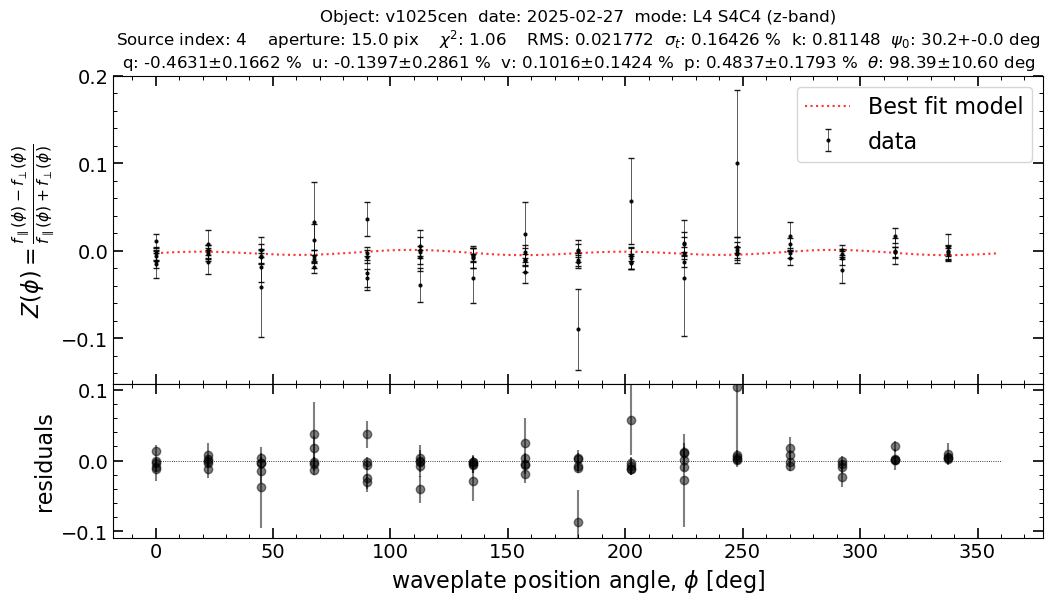

In [12]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs4/20250226_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 76
MAG : -13.716+-0.001
RA : 189.56708959281926
DEC : -38.712663367471606
FWHM : 5.517425875588572
X1 : 429.2847154503441
Y1 : 619.0724813774585
X2 : 448.32252278474334
Y2 : 583.842258248651
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5]
ZI : [0.012+-0.008, -0.01+-0.01, -0.04+-0.06, ..., 0.06+-0.05, -0.03+-0.07,
 0.1

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.5+-0.2 %  Angle of polarization: 100+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

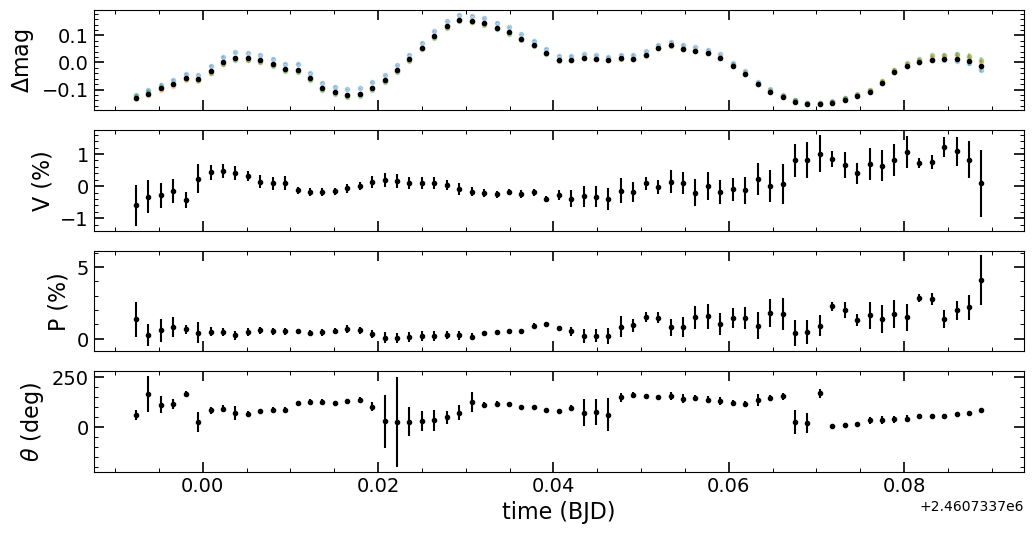

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.12075194691482416,0.004652765857642053,-0.13661378171167726,0.004783130094927297,-0.12408404342727763,0.0049297495510737125,2460733.692373298,429.2847154503441,619.0724813774585,448.32252278474334,583.842258248651,5.30173619494294,-10.7614276549531,0.004483627739398951,-13.114564474838062,0.002918945212028999,-0.13196410075837584,0.013459679162556503,0.012157341409758333,59.758308879614226,25.832708203502744
-0.10322721926455003,0.004580194761625955,-0.12010997895806064,0.004711260727880283,-0.10873138573594865,0.004857485979371656,2460733.693792995,429.2847154503441,619.3224813774585,448.32252278474334,584.092258248651,5.3351764413066025,-10.774399774421447,0.0044088584488820946,-13.110885907133696,0.0029077883818201104,-0.11531341358566216,0.0024915867237931687,0.007883869793879304,166.01320508322607,90.4960176387846
-0.08170260862525502,0.004066090687793886,-0.10128255836548661,0.00418660071414585,-0.09195916773486701,0.004319017745117312,2460733.6952098263,429.2847154503441,619.3224813774585,448.32252278474334,584.092258248651,5.374328284045882,-10.898221867819366,0.003907806442939215,-13.215243727300866,0.0026271238488615673,-0.09584914035491288,0.005870276043265165,0.008236570512766316,113.02834784313995,40.12859274912227
-0.06344449222558168,0.003283598730424793,-0.08519194874943636,0.0033843882457168543,-0.07960151774320323,0.003492495156186865,2460733.6966295177,429.2847154503441,619.3224813774585,448.32252278474334,584.092258248651,5.310251165464722,-11.118562716780744,0.0031495210540227504,-13.41951832883193,0.002162216045399882,-0.07978289292459984,0.008317655599222993,0.0069326512292872105,114.98194323149356,23.837705564069797
-0.04185660413979342,0.002736641948609445,-0.06407952838906184,0.0028241133209514586,-0.060487475518835154,0.0029185831331977486,2460733.6980481786,429.2847154503441,619.5724813774585,448.32252278474334,584.342258248651,5.261506434925164,-11.305127091301765,0.002618689791646943,-13.58527927522349,0.0018467116816717865,-0.05897946479513827,0.006512258412447361,0.0031405230129510635,165.81781951962586,13.79229024430646
-0.045024293725562714,0.0024676173593861854,-0.06740051059743735,0.0025471501786590595,-0.0658578755559116,0.002632007875190713,2460733.6994662606,429.2847154503441,619.3224813774585,448.32252278474334,584.092258248651,5.261506434925164,-11.405470087805368,0.0023607551001518833,-13.689404487628114,0.0016688561925383139,-0.06276168069615906,0.0043381934275458466,0.007632083900652658,26.935503418130114,50.315322081465496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.012461382277209054,0.004832536356253818,-0.004613439161134991,0.00500723852441074,-0.002719271593285555,0.0051915422956830114,2460733.780311201,423.7847154503441,640.0724813774585,442.82252278474334,604.842258248651,4.4828495153100665,-10.238810893583722,0.004614993704931691,-12.472934272872338,0.0033887248328901267,-0.012950660162029948,0.015088694912192724,0.009349585686726235,42.93454238920222,17.72175474396357
0.0,0.005173393568728813,0.008202275160577699,0.0053642783488304716,0.011235384507214619,0.0055692359088002795,2460733.781727962,423.7847154503441,639.8224813774585,442.82252278474334,604.592258248651,4.4828495153100665,-10.14002404775594,0.004936886296753814,-12.361196766882527,0.003665696783333248,0.0,0.028369035224480144,0.003010167872310313,54.317118036809696,3.0346749710327012


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)